# Explore here

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Cargar las variables del archivo .env
load_dotenv()

# Obtener las credenciales reales
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# Verificar que no estén vacías
print("Client ID:", client_id[:5] + "..." if client_id else "❌ CLIENT_ID no encontrado")
print("Client Secret:", client_secret[:5] + "..." if client_secret else "❌ CLIENT_SECRET no encontrado")

# Autenticación con Spotify
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

# Hacer una consulta
lz_uri = '34OLInsXImlQpjzmQw9Wd3'
results = spotify.artist_top_tracks(lz_uri)

# Mostrar resultados
for track in results['tracks'][:10]:
    print(track['name'])


Client ID: 24649...
Client Secret: 0da6c...
Rubia Sol Morena Luna
La Casa
Sanitarios
El Último Polvo
El Instante Pasó
Verónica
Verano
2 Caras 2 Corazones
Las Estrellas
Adiós Amor


In [47]:
# Crear lista de diccionarios con los datos que queremos
tracks_data = []

for track in results['tracks']:
    tracks_data.append({
        'Nombre': track['name'],
        'Popularidad': track['popularity'],
        'Duración (min)': round(track['duration_ms'] / 60000, 2),
        'URL': track['external_urls']['spotify']
    })

# Convertir a DataFrame
df_tracks = pd.DataFrame(tracks_data)

# Ordenar por popularidad de forma creciente
df_sorted = df_tracks.sort_values(by='Popularidad', ascending=True)

# Mostrar el top 3 de menor popularidad
print(df_sorted.head(3))


                Nombre  Popularidad  Duración (min)  \
9           Adiós Amor           48            3.68   
7  2 Caras 2 Corazones           49            3.32   
8        Las Estrellas           49            3.15   

                                                 URL  
9  https://open.spotify.com/track/4gJqqE5Tn9bPwTj...  
7  https://open.spotify.com/track/42SDMQsfHin20j3...  
8  https://open.spotify.com/track/37aNApKMbeiyTe6...  


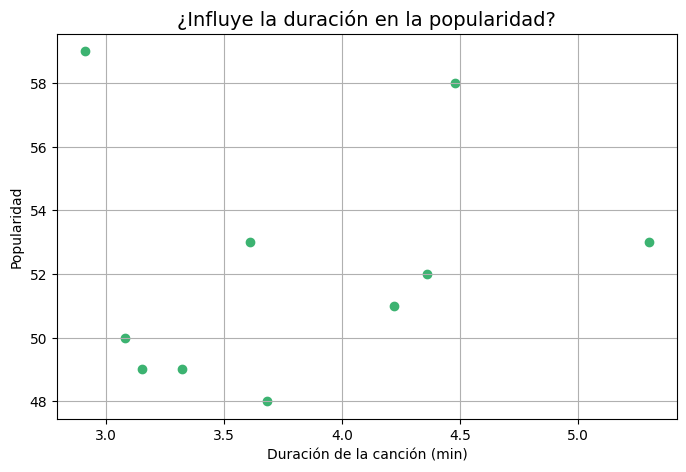

In [48]:
import matplotlib.pyplot as plt

# Scatter plot: Duración vs Popularidad
plt.figure(figsize=(8, 5))
plt.scatter(df_tracks['Duración (min)'], df_tracks['Popularidad'], color='mediumseagreen')
plt.title('¿Influye la duración en la popularidad?', fontsize=14)
plt.xlabel('Duración de la canción (min)')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()


In [49]:
correlacion = df_tracks['Duración (min)'].corr(df_tracks['Popularidad'])
print(f"Coeficiente de correlación: {correlacion:.2f}")

Coeficiente de correlación: 0.16


- No parece haber relación entre la duración de las canciones y su popularidad. 